INFO:tensorflow:Restoring parameters from C:/tmp/train_inception_v1_flowers_FineTune_logs\model.ckpt-1000


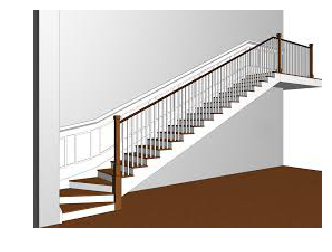

Probability 48.97% => [manhole]
Probability 48.78% => [crosswalk]
Probability 1.81% => [car]
Probability 0.25% => [green traffic light]
Probability 0.19% => [bike]


In [1]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import os
import tensorflow as tf

from nets import inception
from preprocessing import inception_preprocessing

#check point 위치
checkpoints_dir = 'C:/tmp/train_inception_v1_flowers_FineTune_logs'

slim = tf.contrib.slim

image_size = inception.inception_v1.default_image_size    

with tf.Graph().as_default():
    
    # input image 위치
#    image_input = tf.read_file(r"C:\tulip-princess-irene-1_1644278f-26fa-435b-8f98-6558431e5d9c_grande.jpg")
    image_input = tf.read_file(r"C:\project\test\dataset\stair\stair_007.jpg")
    image = tf.image.decode_jpeg(image_input, channels=3)
    processed_image = inception_preprocessing.preprocess_image(image,
                                                         image_size,
                                                         image_size,
                                                         is_training=False)
    processed_images  = tf.expand_dims(processed_image, 0)
    
    with slim.arg_scope(inception.inception_v1_arg_scope()):
        logits, _ = inception.inception_v1(processed_images, num_classes=5, is_training=False) #class의 수에 따라 class 변경
    probabilities = tf.nn.softmax(logits)
    
    init_fn = slim.assign_from_checkpoint_fn(
        os.path.join(checkpoints_dir, 'model.ckpt-1000'),
        slim.get_model_variables('InceptionV1'))
    
    with tf.Session() as sess:
        init_fn(sess)
        np_image, probabilities = sess.run([image, probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]

    # 사진을 보여주는건데 있어도 되고 없어도 됩니다.    
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.axis('off')
    plt.show()

    names = os.listdir("\\project\\test\\dataset")
    for i in range(5):
        index = sorted_inds[i]
        prob = probabilities[index]*100
        print('Probability %0.2f%% => [%s]' % (prob, names[index]))